Importar Librerias

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

Cargar el Dataset

In [11]:
df = pd.read_csv("Breast_cancer_dataset.csv")
# Ver las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nResumen de columnas, tipos de datos y valores nulos:")
print(df.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  wor

Visualizar distribucion de variable objetivo

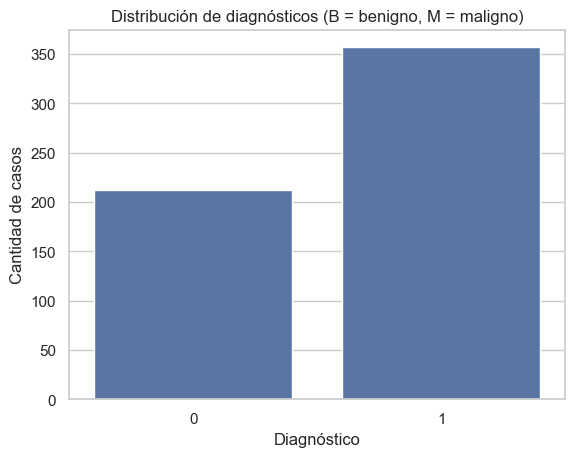

In [12]:
sns.set(style="whitegrid")
sns.countplot(x="diagnosis", data=df)
plt.title("Distribución de diagnósticos (B = benigno, M = maligno)")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad de casos")
plt.show()

Crear el mapa de correlacion

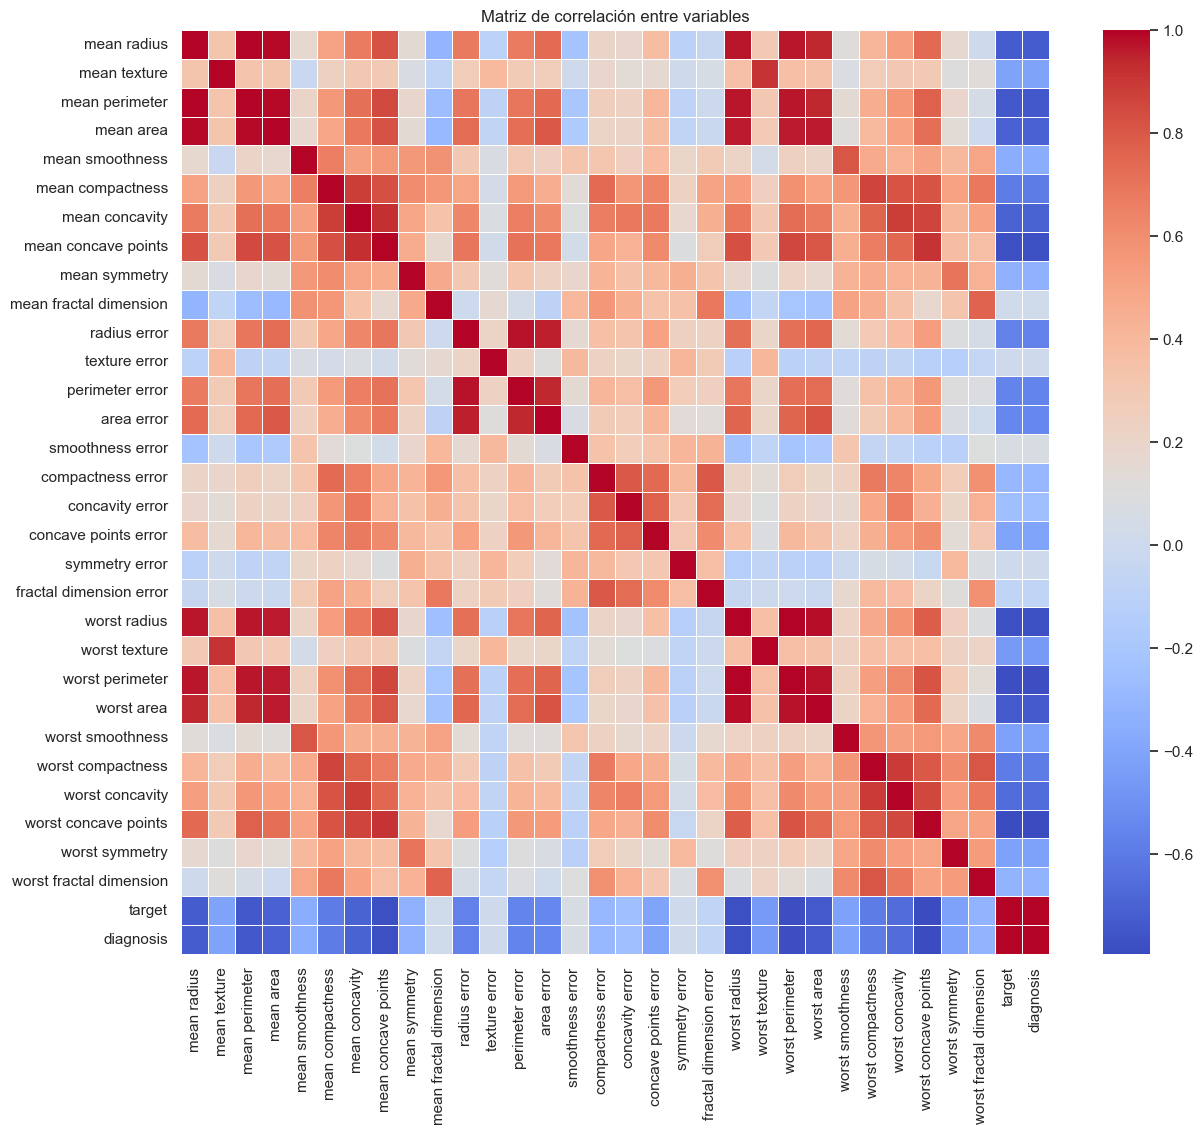

In [13]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de correlación entre variables")
plt.show()

Preprocesamiento

In [14]:
# X: variables predictoras (todas menos diagnosis)
X = df.drop(columns=["diagnosis"])

# y: variable objetivo
y = df["diagnosis"]

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#Verificar tamaños de los conjuntos
print("\nTamaños de los conjuntos de datos:")
print("Tamaño total del dataset:", df.shape)
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaños de los conjuntos de datos:
Tamaño total del dataset: (569, 32)
Tamaño del set de entrenamiento: (455, 31)
Tamaño del set de prueba: (114, 31)


Entrenamiento del modelo

In [15]:
# Crear el modelo
model = LogisticRegression(max_iter=1000)

# Entrenar (fit)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

Evaluar el modelo

In [16]:
print("\nResultados del modelo:")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Resultados del modelo:

Accuracy: 1.0
Precisión: 1.0
Recall: 1.0

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



Imprimir matriz de confusion

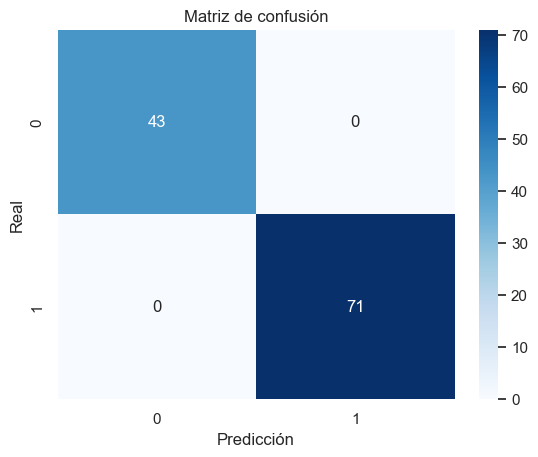

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Es un modelo de regresion logistica, el cual se puede visualizar cuando son 1 o 2 variables predictoras. En este caso tenemos 30 variables numericas que no son posibles de representar visualmente en 3D a la vez. Lo que si se puede hacer es una curva ROC o aplicar reduccion de dimensionalidad con PCA.

Excepcionalmente como muestra la matriz de confusion, los resultados de este modelo son perfectos, esto se puede deber a sobreajuste o que se haya alcanzado un preprocesado ideal, lo cual teniendo en cuenta el tamaño del conjunto de datos, es posible.

Para esta ocasion no ejecuto una curva ROC, ya que mostraria una curva sino una lineal que se ajusta perfectamente al angulo superior izquierdo.